# ROC curve examples

This notebook contains the code for the examples I present in the "Receiver Operating Characteristic (ROC) Curves" lesson as part of the [Statistics in Proteomics online course](https://slavovlab.net/stats).

## Setup

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, 

# Set the plotting theme:
sns.set(context="talk", style="ticks")
pal = sns.color_palette()
half_size = (5.4, 4.04)
pad = 0.01

# Create a directory to save our figures:
figures = Path("figures")
figures.mkdir(exist_ok=True)

## Create the examples we'll be using:

In [2]:
# Set the random seed for reproducibility:
rng = np.random.default_rng(42)

n_examples = 20
df = pd.DataFrame({
    "label": [True]*n_examples + [False]*n_examples,
    "disease": ["Case"]*n_examples + ["Control"]*n_examples,
    "score_1": np.concatenate(
        [rng.normal(3.5, 1, size=n_examples), rng.normal(2, 1, size=n_examples)]
    ),
    "score_2": np.concatenate(
        [rng.normal(4, 1, size=n_examples), rng.normal(2, 1, size=n_examples)]
    )
})

fpr_1, tpr_1, _ = roc_curve(df["label"], df["score_1"])
print("score_1 AUC:", roc_auc_score(df["label"], df["score_1"]))

fpr_2, tpr_2, _ = roc_curve(df["label"], df["score_2"])
print("score_2 AUC:", roc_auc_score(df["label"], df["score_2"]))

df

score_1 AUC: 0.8699999999999999
score_2 AUC: 0.9849999999999999


,label,disease,score_1,score_2
0,True,Case,3.804717,4.743254
1,True,Case,2.460016,4.543154
2,True,Case,4.250451,3.334490
3,True,Case,4.440565,4.232161
4,True,Case,1.548965,4.116686
5,True,Case,2.197820,4.218689
6,True,Case,3.627840,4.871429
7,True,Case,3.183757,4.223596
8,True,Case,3.483199,4.678914
9,True,Case,2.646956,4.067579


Make a plot describing the data

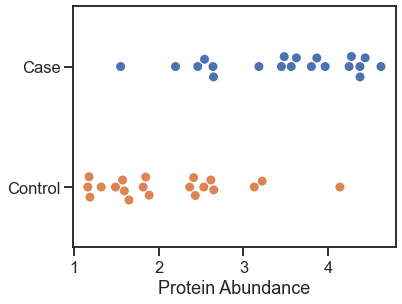

In [3]:
fig, ax = plt.subplots(figsize=half_size)
sns.swarmplot(x=df["score_1"], y=df["disease"], size=9, ax=ax)
ax.set_xlabel("Protein Abundance")
ax.set_ylabel("")
plt.tight_layout(pad=pad)
plt.savefig(figures / "swarm.png", dpi=300)

## Plot ROC curves

First we'll create a plotting function to create well formatted axes:

In [4]:
def roc_axis(ax=None):
    """Create a matplotlib axis that is labeled and scaled for ROC curves"""
    if ax is None:
        ax = plt.gca()
        
    ax.plot([0, 1], [0, 1], color="black", linestyle="dashed", zorder=0)
    ax.set_aspect('equal', 'box')
    ax.set_xlabel("1 - Specificity (FPR)")
    ax.set_ylabel("Sensitivity (TPR)")
    return ax

### Build up an ROC curve manually

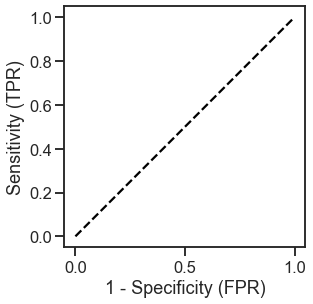

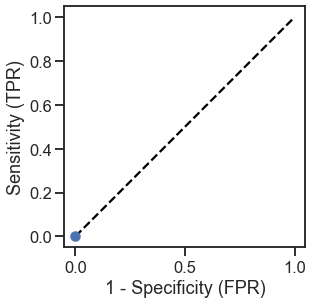

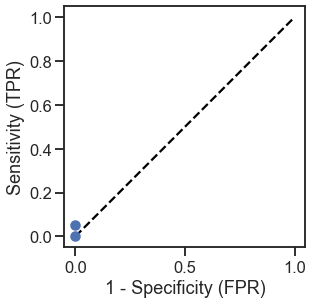

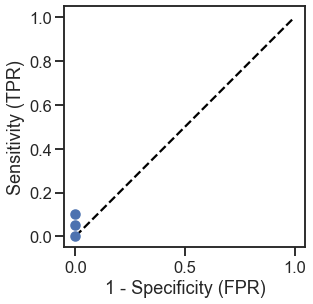

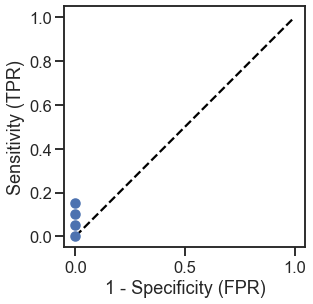

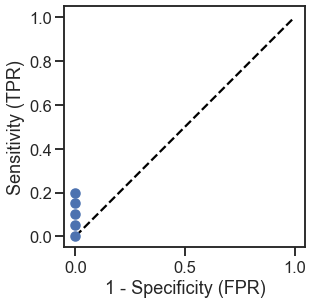

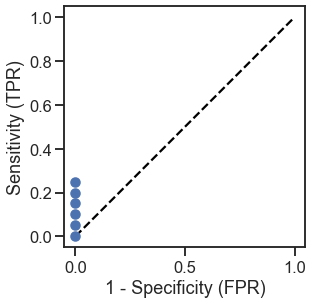

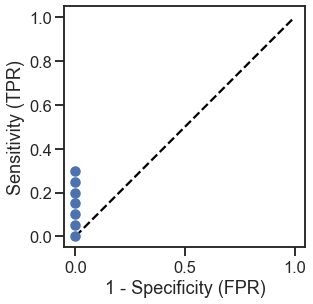

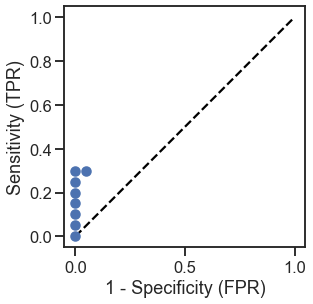

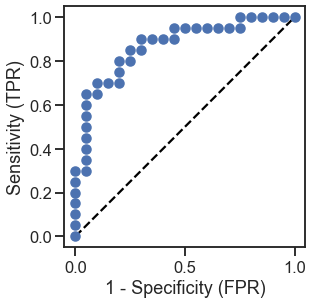

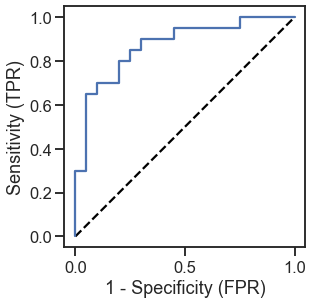

In [5]:
df = df.sort_values("score_1", ascending=False)
df["tpr"] = df["label"].cumsum() / df["label"].sum()
df["fpr"] = (~df["label"]).cumsum() / (~df["label"]).sum()

# Plot the build-up:
fig, ax = plt.subplots(figsize=half_size)
ax = roc_axis(ax)
plt.tight_layout(pad=pad)
plt.savefig(figures / "buildup_blank.png", dpi=300)

for idx in range(8):
    fig, ax = plt.subplots(figsize=half_size)
    ax = roc_axis(ax)
    sel = df.iloc[:idx, :]
    ax.scatter([0] + list(sel["fpr"]), [0] + list(sel["tpr"]))
    plt.tight_layout(pad=pad)
    plt.savefig(figures / f"buildup_{idx}.png", dpi=300)
    
# Final scatter plot:
fig, ax = plt.subplots(figsize=half_size)
ax = roc_axis(ax)
ax.scatter([0] + list(df["fpr"]), [0] + list(df["tpr"]))
plt.tight_layout(pad=pad)
plt.savefig(figures / "buildup_scatter.png", dpi=300)


# Remove the points
fig, ax = plt.subplots(figsize=half_size)
ax = roc_axis(ax)
ax.plot([0] + list(df["fpr"]), [0] + list(df["tpr"]))
plt.tight_layout(pad=pad)
plt.savefig(figures / "roc_score_1.png", dpi=300)

## Plot various versions of ROC curves

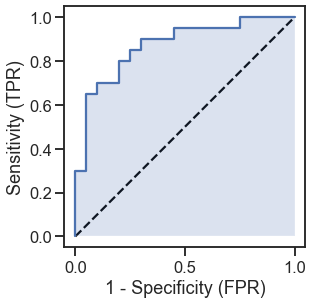

In [6]:
fig, ax = plt.subplots(figsize=half_size)
ax = roc_axis(ax)
ax.plot(fpr_1, tpr_1)
ax.fill_between(fpr_1, tpr_1, facecolor=pal[0], alpha=0.2)
plt.tight_layout(pad=pad)
plt.savefig(figures / "roc_filled.png", dpi=300)

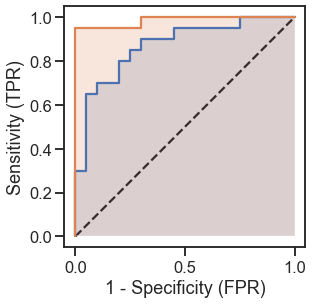

In [7]:
fig, ax = plt.subplots(figsize=half_size)
ax = roc_axis(ax)
ax.plot(fpr_1, tpr_1)
ax.plot(fpr_2, tpr_2)
ax.fill_between(fpr_1, tpr_1, facecolor=pal[0], alpha=0.2)
ax.fill_between(fpr_2, tpr_2, facecolor=pal[1], alpha=0.2)
plt.tight_layout(pad=pad)
plt.savefig(figures / "roc_both_scores.png", dpi=300)

## Create an imbalanced dataset

In [8]:
# Set the random seed for reproducibility:
rng = np.random.default_rng(1)

n_examples = (5, 95)
df = pd.DataFrame({
    "label": [True]*n_examples[0] + [False]*n_examples[1],
    "disease": ["Case"]*n_examples[0] + ["Control"]*n_examples[1],
    "score_1": np.concatenate(
        [rng.normal(5, 1, size=n_examples[0]), rng.normal(3, 2, size=n_examples[1])]
    )
})

fpr_1, tpr_1, _ = roc_curve(df["label"], df["score_1"])
print("score_1 AUC:", roc_auc_score(df["label"], df["score_1"]))

df = df.sort_values("score_1", ascending=False).reset_index()
df["tpr"] = df["label"].cumsum() / df["label"].sum()
df["fdr"] = (~df["label"]).cumsum() / (df.index+1)
df.head(20)

score_1 AUC: 0.9178947368421053


,index,label,disease,score_1,tpr,fdr
0,30,False,Control,7.235678,0.0,1.000000
1,33,False,Control,7.085543,0.0,1.000000
2,4,True,Case,5.905356,0.2,0.666667
3,1,True,Case,5.821618,0.4,0.500000
4,22,False,Control,5.588128,0.4,0.600000
5,70,False,Control,5.449294,0.4,0.666667
6,0,True,Case,5.345584,0.6,0.571429
7,2,True,Case,5.330437,0.8,0.500000
8,94,False,Control,5.111486,0.8,0.555556
9,23,False,Control,5.013449,0.8,0.600000


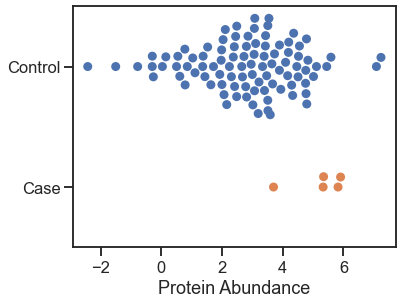

In [9]:
fig, ax = plt.subplots(figsize=half_size)
sns.swarmplot(x=df["score_1"], y=df["disease"], size=9, ax=ax)
ax.set_xlabel("Protein Abundance")
ax.set_ylabel("")
plt.tight_layout(pad=pad)
plt.savefig(figures / "swarm_imbalanced.png", dpi=300)

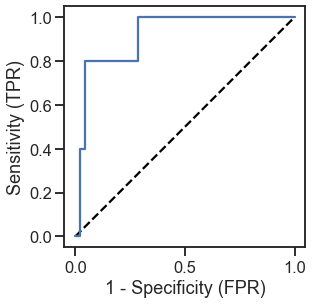

In [10]:
fig, ax = plt.subplots(figsize=half_size)
ax = roc_axis(ax)
ax.plot(fpr_1, tpr_1)
plt.tight_layout(pad=pad)
plt.savefig(figures / "roc_imbalance.png", dpi=300)